## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

In [ ]:
train_data = pd.read_csv("house_prediction_train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
# reading actual test values to calculate mse
d = pd.read_csv("compare.csv")
test_acutal = d["SalePrice"]

In [ ]:
# saving submission id because we will need it when we do the submission on kaggle
submission_id = test_data["Id"]

# Combining Training and Testing data Together so tat we can process them together

In [ ]:
X_train = train_data.iloc[:,:-1]
Y_train = train_data["SalePrice"]
X_test = test_data

N=len(train_data)  # from here testing data starts it will be helpful afterwards

print(train_data.shape)
print(test_data.shape)

data = pd.concat([X_train,X_test],axis=0)
data.drop(labels = "Id",axis=1,inplace = True)
print(data.shape)
data

## Checking the type of feature

In [ ]:
for col in data.columns:
    print(col,data[col].dtype)

# Checking if the data contains missing vales or not

In [ ]:
data.isnull().sum()

when we read the description we will se that some feature conatins nan but that nan doesnt mean it contains missing values it means that feature is no present at property so we will fill these feature with "no"

In [ ]:
features_fillnan_as_no=["BsmtCond","BsmtQual","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageFinish","GarageType","GarageQual","GarageCond","Alley","PoolQC","Fence","MiscFeature"]

In [ ]:
for col in features_fillnan_as_no:
    data[col].fillna(value = "no",inplace=True)

Now again Checking the columns that contains missing values and if the missing values is >50% then we will remove such column

In [ ]:
def remove_columns(col):
    data.drop(labels=col,axis=1,inplace=True)

In [ ]:
col_removed=[]
for column in data.columns[:-1]:
    check = data[column].isnull().values.any()   #true if that column contains missing values else False
    no = data[column].isnull().values.sum()    # gives the no of missing values
    
    if (check == True) and ((no/data.shape[0])>0.60):    #condition iif the data contains missing values ann dthe no of missing values is greater than 60%
        print(column," has missing values")
        print(no," no of missing values")
        remove_columns(column)
        col_removed.append(column)
    
print("Done with removing these columns",col_removed) 

no column has more than 50% of missing values

## Filling Missing Values

For integer type of column we will be filling the na values using mode and for float type we will use mean.

### Checking the columns wich contains missing values so that we can deal with them

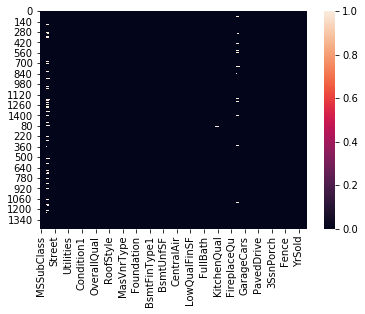

In [12]:
sns.heatmap(data.isnull())

In [13]:
# Now chceking columns which has missing values so we can deal with them
missing_dict ={}
for column in data.columns[:-1]:
    check = data[column].isnull().values.any()
    no = data[column].isnull().values.sum()
    if (check == True) :
        print(column," has missing values")
        print(no," no of missing values")
        missing_dict[column]=no

MSZoning  has missing values
4  no of missing values
LotFrontage  has missing values
486  no of missing values
Utilities  has missing values
2  no of missing values
Exterior1st  has missing values
1  no of missing values
Exterior2nd  has missing values
1  no of missing values
MasVnrType  has missing values
24  no of missing values
MasVnrArea  has missing values
23  no of missing values
BsmtFinSF1  has missing values
1  no of missing values
BsmtFinSF2  has missing values
1  no of missing values
BsmtUnfSF  has missing values
1  no of missing values
TotalBsmtSF  has missing values
1  no of missing values
Electrical  has missing values
1  no of missing values
BsmtFullBath  has missing values
2  no of missing values
BsmtHalfBath  has missing values
2  no of missing values
KitchenQual  has missing values
1  no of missing values
Functional  has missing values
2  no of missing values
GarageYrBlt  has missing values
159  no of missing values
GarageCars  has missing values
1  no of missing value

### Filling Missing values

if the column is of objectt type or integer type then we will fill them with mode and if it is of float type then we will fil it with mean

In [14]:
def fill_missing_val(col):
    
    if data[col].dtype == "float64":      # filling missing values in float by mean
        data[col].fillna(value=(data[col].mean()),inplace=True,)
        print("Missing value in column {} has been filled by mean".format(col))
        
    else:    # filling missing values in other object by most frequent value
        
        data[col].fillna(value=(data[col].mode()[0]),inplace=True)
        print("Missing value in column {} has been filled by mode".format(col))

In [15]:
for col in data.columns:
    check = data[col].isnull().values.any()
    if check :
        fill_missing_val(col)

Missing value in column MSZoning has been filled by mode
Missing value in column LotFrontage has been filled by mean
Missing value in column Utilities has been filled by mode
Missing value in column Exterior1st has been filled by mode
Missing value in column Exterior2nd has been filled by mode
Missing value in column MasVnrType has been filled by mode
Missing value in column MasVnrArea has been filled by mean
Missing value in column BsmtFinSF1 has been filled by mean
Missing value in column BsmtFinSF2 has been filled by mean
Missing value in column BsmtUnfSF has been filled by mean
Missing value in column TotalBsmtSF has been filled by mean
Missing value in column Electrical has been filled by mode
Missing value in column BsmtFullBath has been filled by mean
Missing value in column BsmtHalfBath has been filled by mean
Missing value in column KitchenQual has been filled by mode
Missing value in column Functional has been filled by mode
Missing value in column GarageYrBlt has been filled

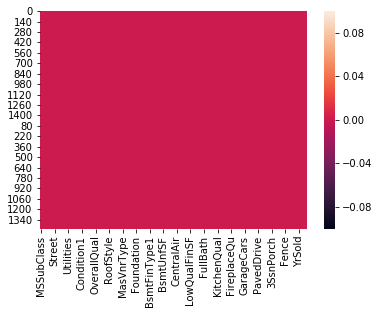

In [16]:
sns.heatmap(data.isnull())

In [17]:
print(data.shape)
low_variance_col = []
for col in data.columns:
    var = list(data[col].value_counts()/len(data))
    if var[0]>0.80:
        low_variance_col.append(col)
low_variance_col

(2919, 79)


['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'SaleType',
 'SaleCondition']

As we can see all the missing values has been filled

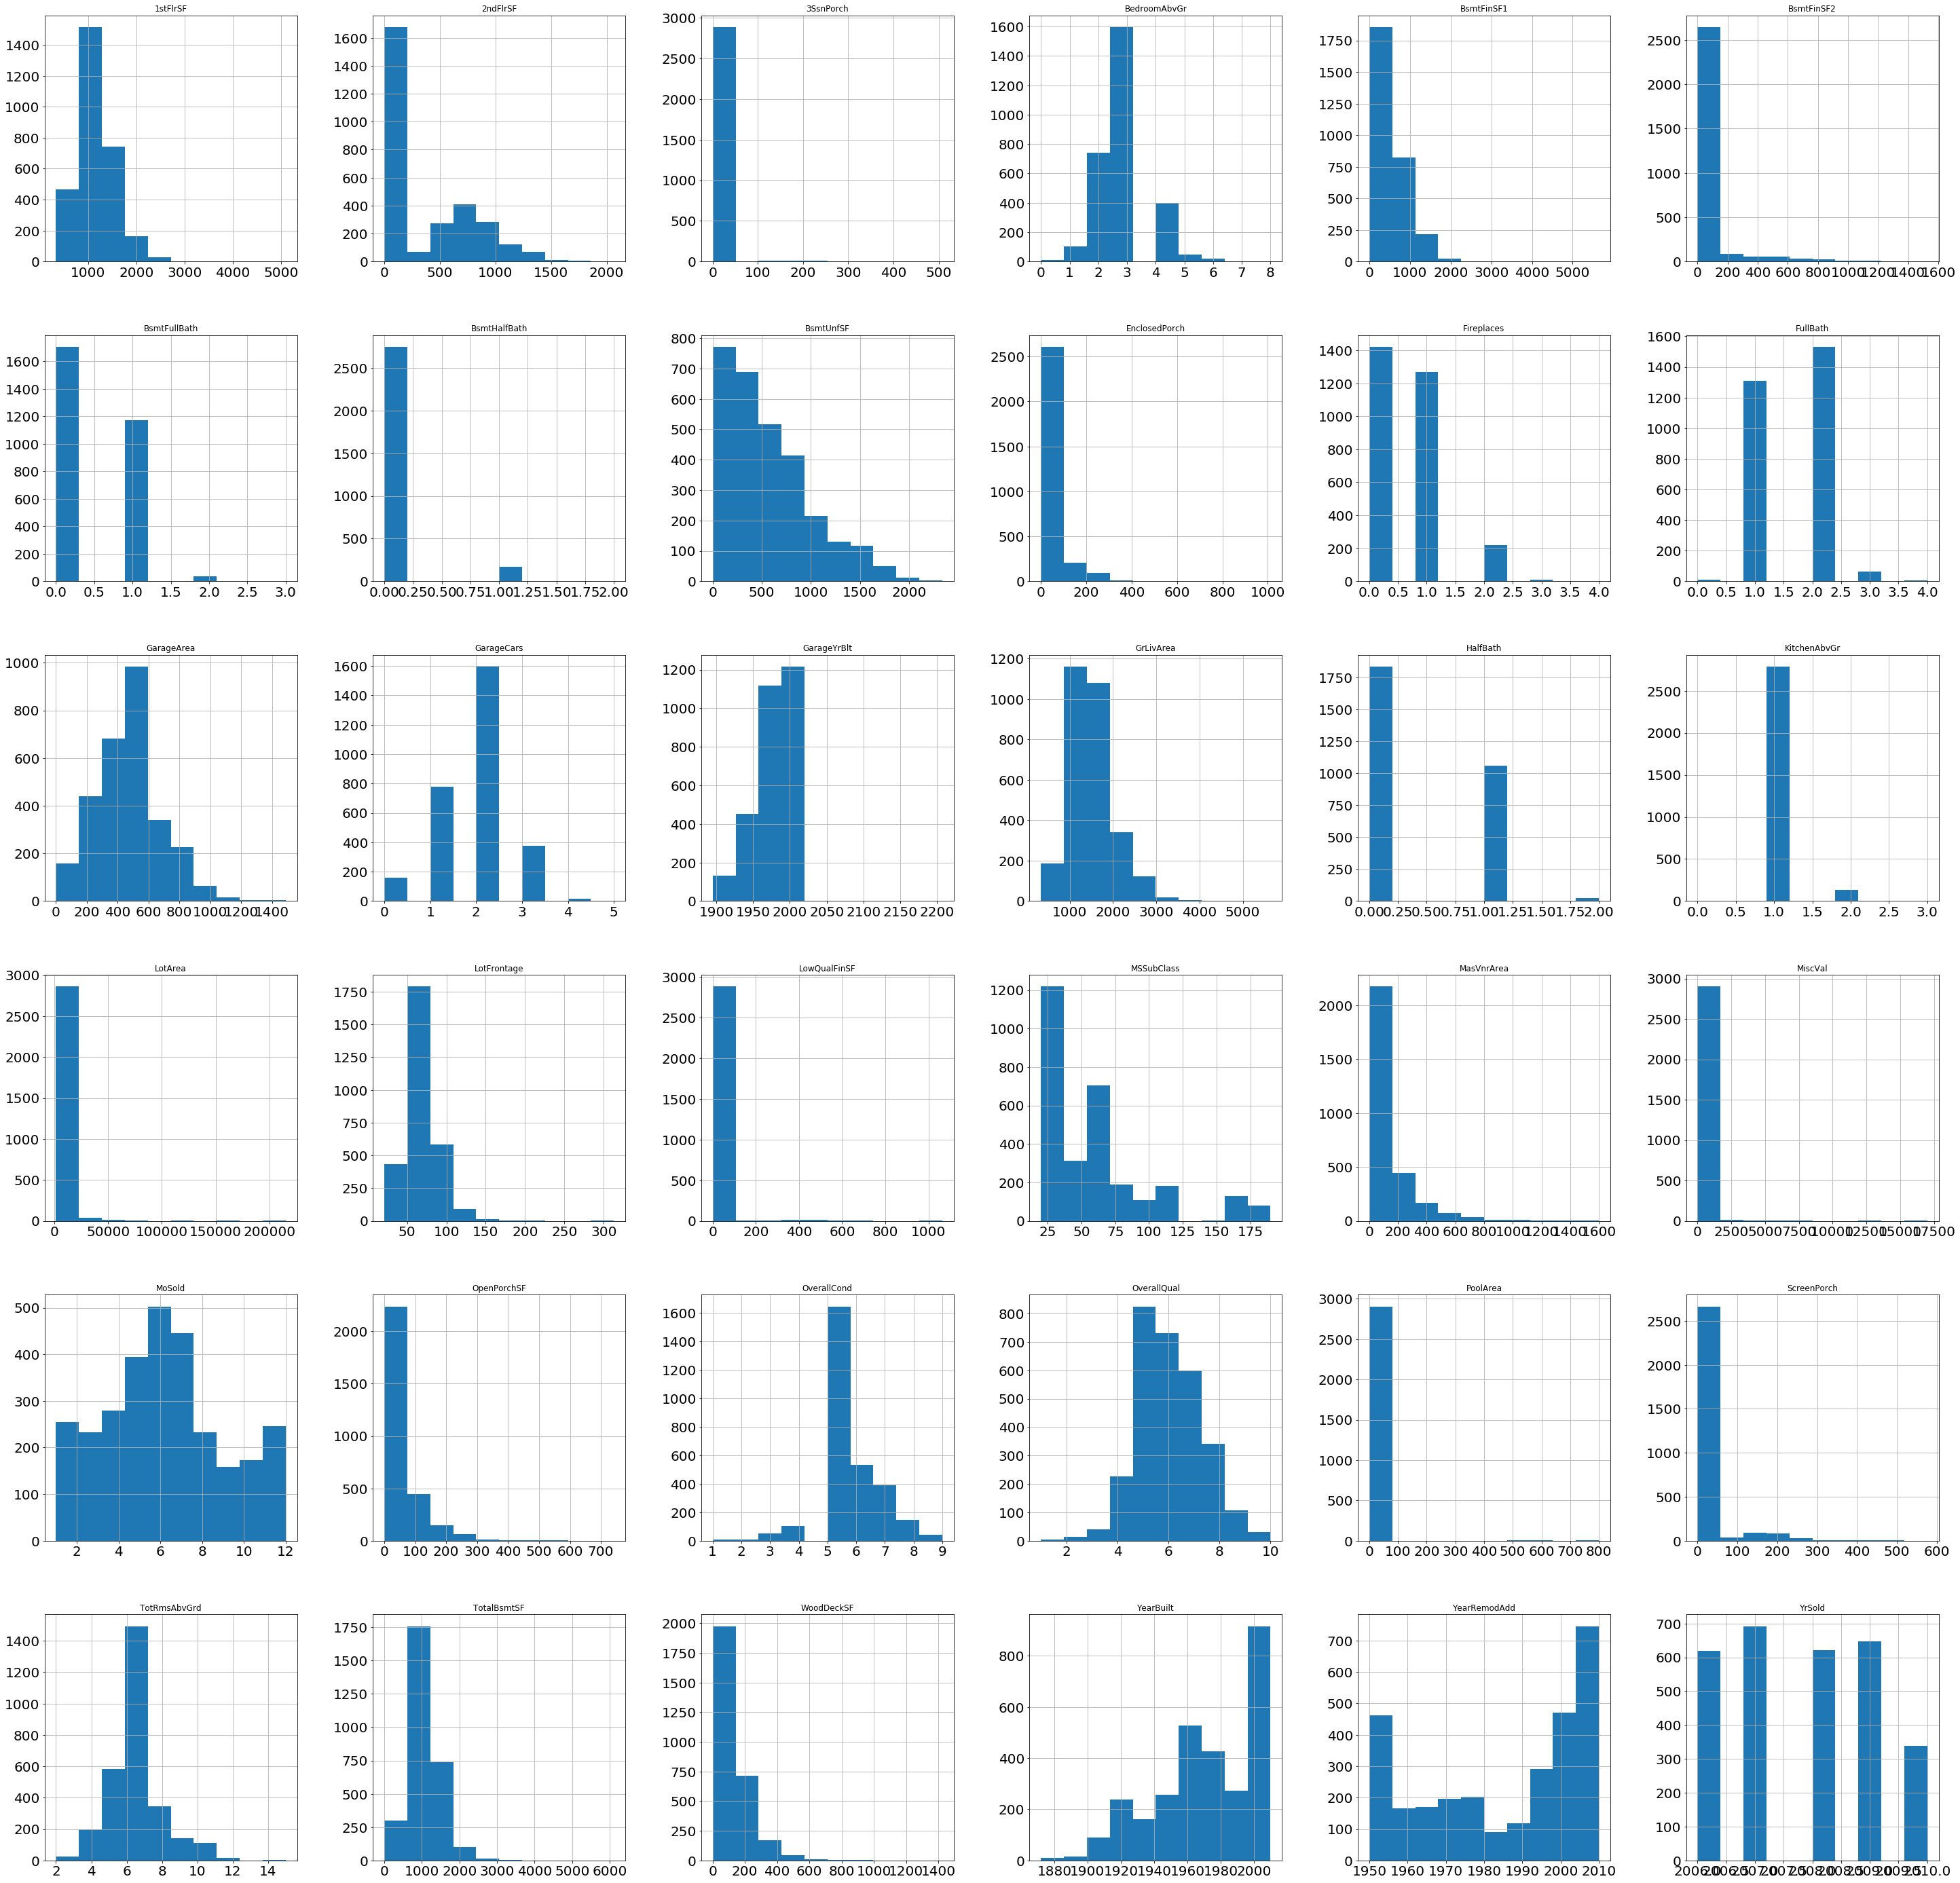

In [18]:
data.hist(figsize=(50,50),xlabelsize=20,ylabelsize=20)
plt.show()

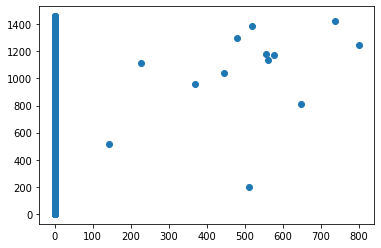

In [19]:
plt.scatter(data["PoolArea"],y=data.index)
#as we can see pol area has low variance so its better to remove it

In [20]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

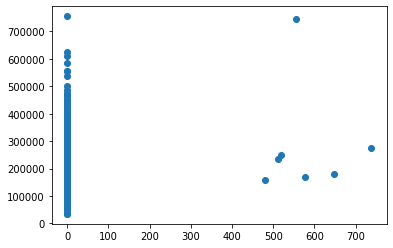

In [21]:
plt.scatter(x=data.iloc[:N]["PoolArea"],y=Y_train)

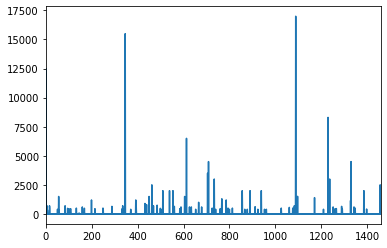

In [22]:
data["MiscVal"].plot()

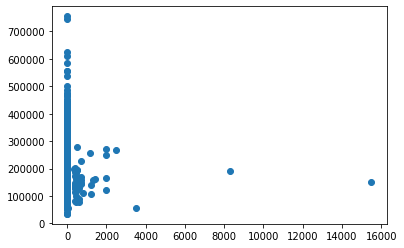

In [23]:
plt.scatter(x=data.iloc[:N]["MiscVal"],y=Y_train)

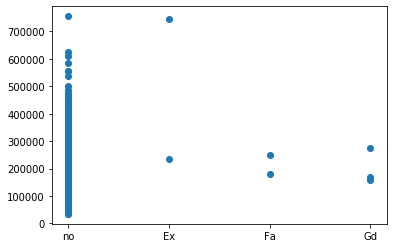

In [24]:
plt.scatter(x=data.iloc[:N]["PoolQC"],y=Y_train)

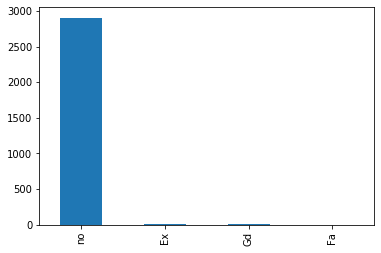

In [25]:
data['PoolQC'].value_counts().plot(kind='bar')

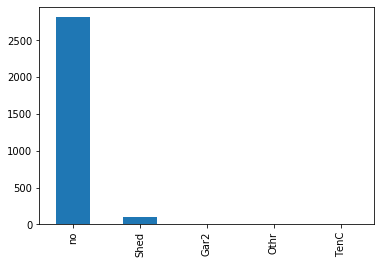

In [26]:
data['MiscFeature'].value_counts().plot(kind='bar')

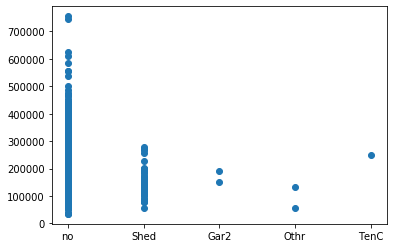

In [27]:
plt.scatter(x=data.iloc[:N]["MiscFeature"],y=Y_train)

As columns MiscFeature,MiscValue,PoolArea,PoolQC has low variance and also the correlation is less so we will drop these columns

In [28]:
train.drop(labels=["PoolQC","MiscVal","MiscFeature","PoolArea"],axis=1,inplace=True)
test.drop(labels=["PoolQC","MiscVal","MiscFeature","PoolArea"],axis=1,inplace=True)

## Now analysis on some other features

In [29]:
#left columns
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

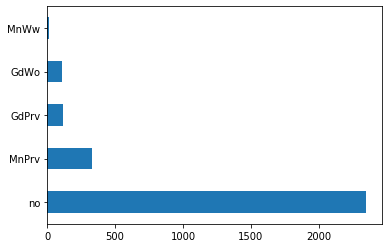

In [30]:
data["Fence"].value_counts().plot(kind="barh")

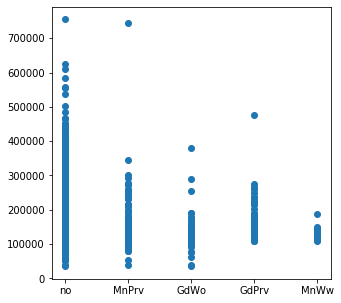

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(data.iloc[:N]['Fence'],Y_train)
plt.show()

In [178]:
# we can see when we plot fence with target variable we can see there are some points which has outliners so we need to remove them
data[["Fence"]=="no"]&

count     2919
unique       5
top         no
freq      2348
Name: Fence, dtype: object

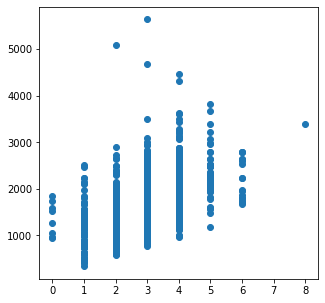

In [175]:
plt.figure(figsize=(5,5))
plt.scatter(data['BedroomAbvGr'],data['GrLivArea'])
plt.show()

In [89]:
from pandas.plotting import scatter_matrix

In [93]:
data.iloc[:N].shape,Y_train.shape

((1460, 79), (1460,))

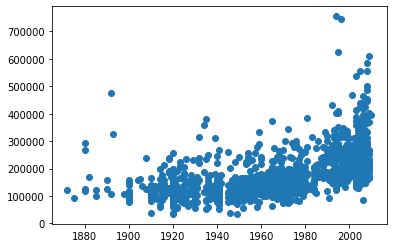

In [94]:
plt.scatter(x=(data.iloc[:N])["YearBuilt"],y=Y_train)

# Feature Engineering

## Feature Analysis
Analysing about features what features to combine to remove etc

In [17]:
len(data.columns)

79

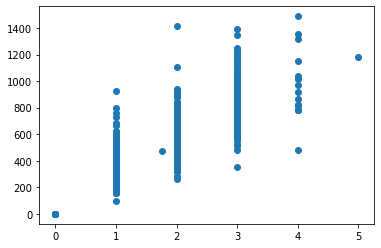

In [18]:
plt.scatter(data['GarageCars'], data['GarageArea'])

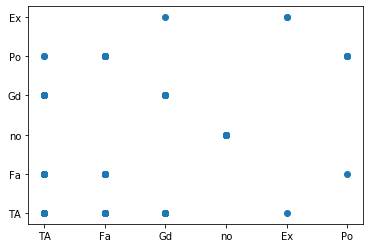

In [19]:

plt.scatter(data['GarageQual'], data['GarageCond'])

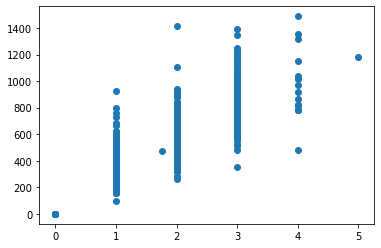

In [20]:
plt.scatter(data['GarageCars'], data['GarageArea'])

In [21]:
corr, _ = pearsonr(data['OverallQual'], data['OverallCond'])

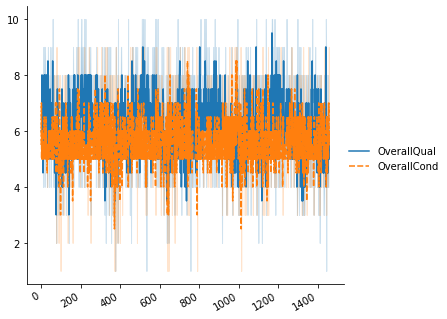

In [22]:
g = sns.relplot( kind="line", data=data[['OverallQual','OverallCond']])
g.fig.autofmt_xdate()

In [23]:
corr, _ = pearsonr(data['GarageCars'], data['GarageArea'])
corr

0.8897004146858468

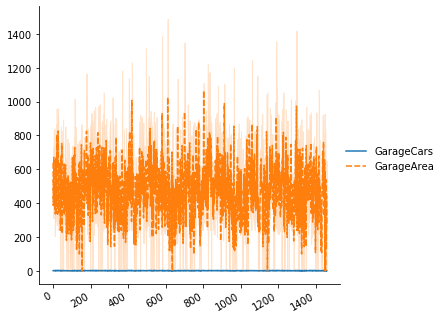

In [24]:
g = sns.relplot( kind="line", data=data[['GarageCars','GarageArea']])
g.fig.autofmt_xdate()

In [25]:
data['ExterQual'].unique(),data['ExterCond'].unique()

(array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object),
 array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object))

data['ExterQual'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po"],value = [5,4,3,2,1],inplace=True )
data['ExterCond'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po"],value = [5,4,3,2,1],inplace=True )

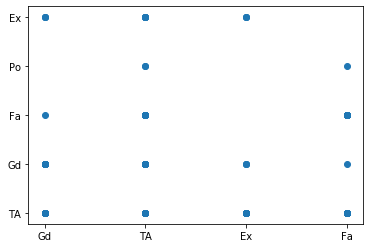

In [26]:
plt.scatter(data['ExterQual'],data['ExterCond'])

In [27]:
data[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
# so we are combining two column BsmtFinSF1	BsmtFinSF2 to create bsmtfinished

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706.0,0.0,150.0,856.0
1,978.0,0.0,284.0,1262.0
2,486.0,0.0,434.0,920.0
3,216.0,0.0,540.0,756.0
4,655.0,0.0,490.0,1145.0
5,732.0,0.0,64.0,796.0
6,1369.0,0.0,317.0,1686.0
7,859.0,32.0,216.0,1107.0
8,0.0,0.0,952.0,952.0
9,851.0,0.0,140.0,991.0


In [28]:
data[["BedroomAbvGr","TotRmsAbvGrd"]]

,BedroomAbvGr,TotRmsAbvGrd
0,3,8
1,3,6
2,3,6
3,3,7
4,4,9
5,1,5
6,3,7
7,3,7
8,2,8
9,2,5


In [29]:
data[['OpenPorchSF',"EnclosedPorch"]]

,OpenPorchSF,EnclosedPorch
0,61,0
1,0,0
2,42,0
3,35,272
4,84,0
5,30,0
6,57,0
7,204,228
8,0,205
9,4,0


In [30]:
data[['1stFlrSF','2ndFlrSF',"GrLivArea","LowQualFinSF"]]

,1stFlrSF,2ndFlrSF,GrLivArea,LowQualFinSF
0,856,854,1710,0
1,1262,0,1262,0
2,920,866,1786,0
3,961,756,1717,0
4,1145,1053,2198,0
5,796,566,1362,0
6,1694,0,1694,0
7,1107,983,2090,0
8,1022,752,1774,0
9,1077,0,1077,0


In [31]:
data.iloc[:N].shape

(1460, 79)

In [32]:
df = pd.concat([(data.iloc[:N]),Y_train],axis=1)
df.shape,data.shape,N

((1460, 80), (2919, 79), 1460)

In [33]:
df[["MSSubClass","SalePrice"]].corr()

,MSSubClass,SalePrice
MSSubClass,1.000000,-0.084284
SalePrice,-0.084284,1.000000


In [34]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [35]:
data[['BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath']]

,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
0,706.0,Unf,0.0,150.0,856.0,1.0,0.0,2,1
1,978.0,Unf,0.0,284.0,1262.0,0.0,1.0,2,0
2,486.0,Unf,0.0,434.0,920.0,1.0,0.0,2,1
3,216.0,Unf,0.0,540.0,756.0,1.0,0.0,1,0
4,655.0,Unf,0.0,490.0,1145.0,1.0,0.0,2,1
5,732.0,Unf,0.0,64.0,796.0,1.0,0.0,1,1
6,1369.0,Unf,0.0,317.0,1686.0,1.0,0.0,2,0
7,859.0,BLQ,32.0,216.0,1107.0,1.0,0.0,2,1
8,0.0,Unf,0.0,952.0,952.0,0.0,0.0,2,0
9,851.0,Unf,0.0,140.0,991.0,1.0,0.0,1,0


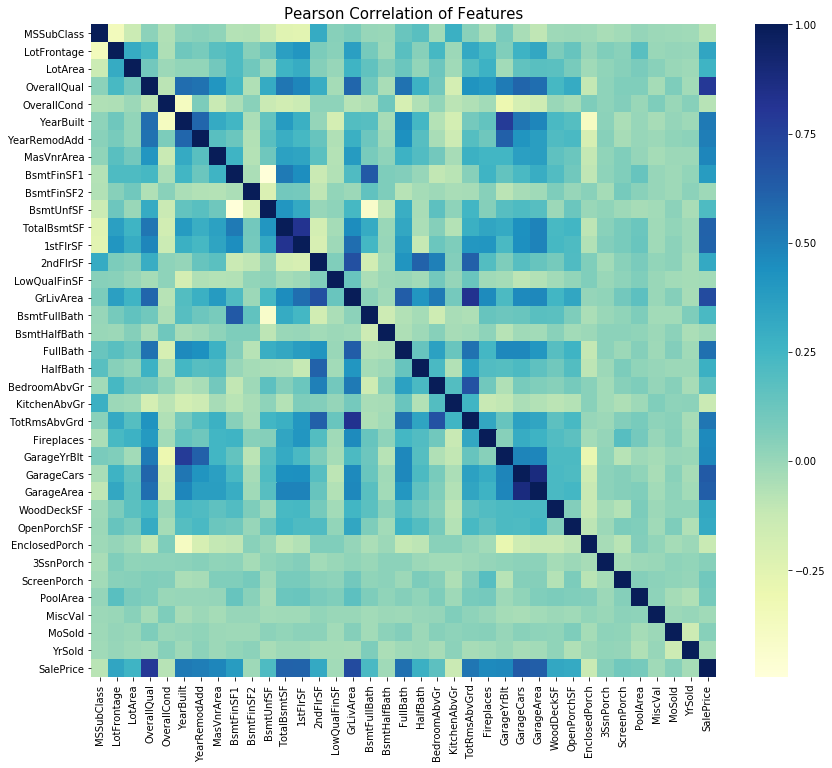

In [36]:
 _, ax = plt.subplots(figsize=(14, 12))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
df = pd.concat([(data.iloc[:N]),Y_train],axis=1)
_ = sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()    

In [37]:
data[["YearBuilt",'GarageYrBlt']]

,YearBuilt,GarageYrBlt
0,2003,2003.000000
1,1976,1976.000000
2,2001,2001.000000
3,1915,1998.000000
4,2000,2000.000000
5,1993,1993.000000
6,2004,2004.000000
7,1973,1973.000000
8,1931,1931.000000
9,1939,1939.000000


In [38]:
data[['GrLivArea','TotRmsAbvGrd','BedroomAbvGr',"KitchenAbvGr"]]

,GrLivArea,TotRmsAbvGrd,BedroomAbvGr,KitchenAbvGr
0,1710,8,3,1
1,1262,6,3,1
2,1786,6,3,1
3,1717,7,3,1
4,2198,9,4,1
5,1362,5,1,1
6,1694,7,3,1
7,2090,7,3,1
8,1774,8,2,2
9,1077,5,2,2


In [39]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Rough

In [50]:
data['ExterQual'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['ExterCond'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['BsmtQual'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['BsmtCond'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['HeatingQC'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['KitchenQual'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['FireplaceQu'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['GarageQual'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['GarageCond'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
#
data["BsmtFinType1"].replace(to_replace =['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ','Unf','no'],value = [6,5,4,3,2,1,0],inplace=True )
data["BsmtFinType2"].replace(to_replace =['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ','Unf','no'],value = [6,5,4,3,2,1,0],inplace=True )

In [51]:
Encoded_data = pd.get_dummies(data)

In [52]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
#from sklearn.metrics import 

In [53]:
X_train = Encoded_data.iloc[:N]
X_test = Encoded_data.iloc[N:]
print("Dimesnion of training and testing data",X_train.shape,X_test.shape)

Dimesnion of training and testing data (1460, 267) (1459, 267)


In [54]:
# Crreating the object of xgboost
xg_reg = xgb.XGBRegressor()

# Fitting the model on our training data
xg_reg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
Y_pred = xg_reg.predict(X_test)

In [64]:
np.log(np.sqrt(mean_squared_error(np.log(test_acutal),np.log(Y_pred))))

-2.6023850690628

In [57]:
xg_reg.score(X_train,Y_train)

0.999452519159302

In [58]:
xg_reg.score(X_test,Y_pred)

1.0

In [59]:
xg_reg.score(X_test,test_acutal)

0.9726477407364289

In [49]:
submission_df = pd.DataFrame()
submission_df["Id"] = list(submission_id)
submission_df["SalePrice"] = Y_pred
submission_df.to_csv("sample_submission.csv",index=False)

# New Features

### Label Encoding as they Represent the Score/Points

In [787]:
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'no', 'Fa'], dtype=object)

In [788]:
data['ExterQual'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['ExterCond'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['BsmtQual'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['BsmtCond'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['HeatingQC'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['KitchenQual'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['FireplaceQu'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['GarageQual'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
data['GarageCond'].replace(to_replace =[ 'Ex','Gd', 'TA', 'Fa',"Po","no"],value = [5,4,3,2,1,0],inplace=True )
#
data["BsmtFinType1"].replace(to_replace =['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ','Unf','no'],value = [6,5,4,3,2,1,0],inplace=True )
data["BsmtFinType2"].replace(to_replace =['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ','Unf','no'],value = [6,5,4,3,2,1,0],inplace=True )

### Creating New Features

In [789]:
Exter_points = np.sum(data[['ExterQual','ExterCond']],axis=1)
Bsmt_points = np.sum(data[['BsmtQual','BsmtCond']],axis=1)
Garage_points = np.sum(data[['GarageQual','GarageCond']],axis=1)
overall_points = np.sum(data[['OverallQual','OverallCond']],axis=1)/2
#basment finished
BsmtFin = np.sum(data[['BsmtFinSF1','BsmtFinSF2']],axis=1)
age_house = data["YrSold"]-data["YearBuilt"]
bsmt_bath = np.sum(data[['BsmtFullBath','BsmtHalfBath']],axis=1)
total_bath = np.sum(data[['FullBath','HalfBath']],axis=1)

### Dropping the features from which we have created new one

In [790]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [791]:
# dropiing these columns as we have created new columns using these
data.drop(labels=['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','ExterQual','ExterCond','BsmtQual','BsmtCond','YrSold','GarageQual','YearBuilt','GarageCond','OverallQual','OverallCond','BsmtFinSF1','BsmtFinSF2'],axis=1,inplace=True)

In [792]:
#unnecessary col
data.drop(labels=['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

In [793]:
data.shape

(2919, 61)

In [794]:
#Adding the new columns in our dataFrame
data["Exter_points"] = Exter_points
data["Bsmt_points"] = Bsmt_points
data["Garage_points"] = Garage_points
data["overall_points"] = overall_points
data["BsmtFin"] = BsmtFin
data["Age_House"] = age_house
data["Bsmt_bath"] = bsmt_bath
data["Total_bath"] = total_bath

In [795]:
# as one row in age house column contains -1 and age cant be negative so we will replace it with 0
data["Age_House"].replace(to_replace=[-1],value = 0,inplace=True)

In [796]:
#shape of the dataframe
data.shape

(2919, 69)

In [797]:
data["BsmtFinType1"].unique()

array([6, 5, 1, 3, 4, 0, 2], dtype=int64)

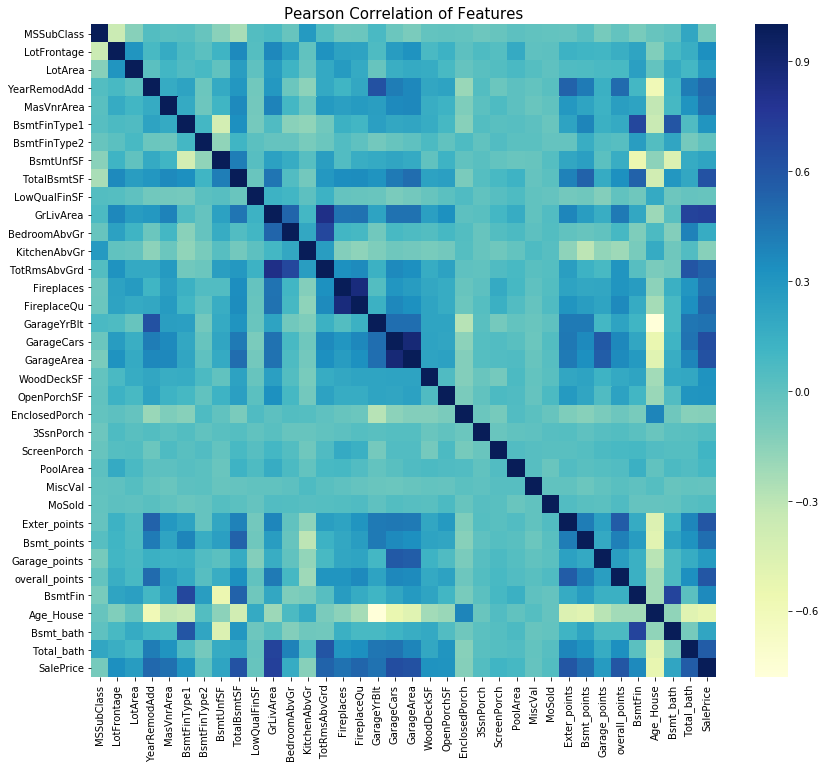

In [798]:
 _, ax = plt.subplots(figsize=(14, 12))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
df = pd.concat([(data.iloc[:N]),Y_train],axis=1)
_ = sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()    

## Removing Features which has low variance

### columns which has contains only one type of value in 70% of the data

In [579]:
data["Condition2"].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [195]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
co = lb_make.fit_transform(data["Condition2"])
co

array([2, 2, 2, ..., 2, 2, 2])

In [196]:
set(co)

{0, 1, 2, 3, 4, 5, 6, 7}

In [589]:
print(data.shape)
low_variance_col = []
for col in data.columns:
    var = list(data[col].value_counts()/len(data))
    if var[0]>0.90:
        low_variance_col.append(col)
low_variance_col

(2919, 69)


['Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'KitchenAbvGr',
 'Functional',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal']

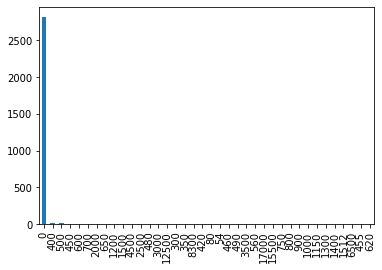

In [590]:
data['MiscVal'].value_counts().plot(kind='bar')

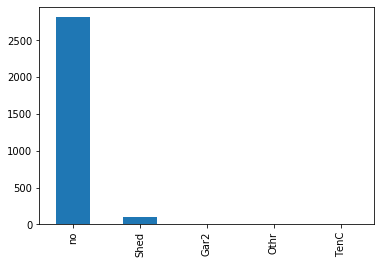

In [591]:
data['MiscFeature'].value_counts().plot(kind='bar')

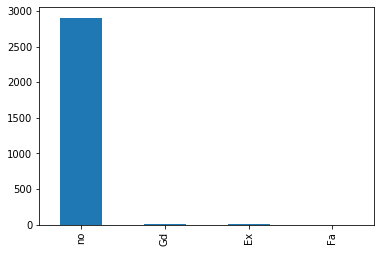

In [592]:
data['PoolQC'].value_counts().plot(kind='bar')

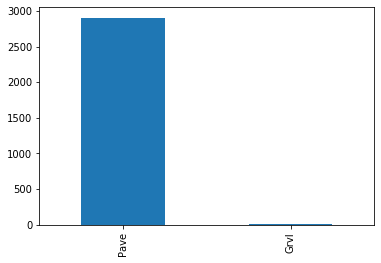

In [593]:
data['Street'].value_counts().plot(kind='bar')

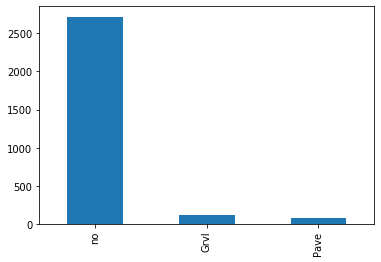

In [594]:
data['Alley'].value_counts().plot(kind='bar')

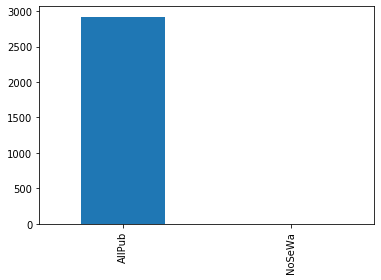

In [595]:
data['Utilities'].value_counts().plot(kind='bar')

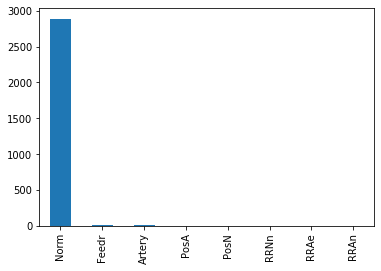

In [596]:
data['Condition2'].value_counts().plot(kind='bar')

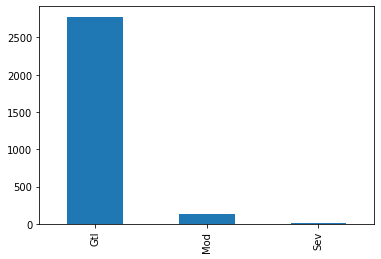

In [597]:
data['LandSlope'].value_counts().plot(kind='bar')

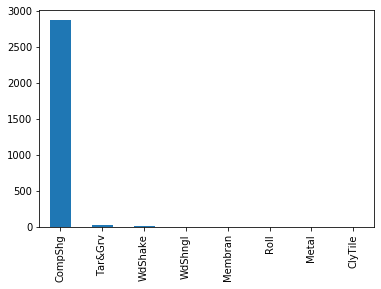

In [598]:
data['RoofMatl'].value_counts().plot(kind='bar')

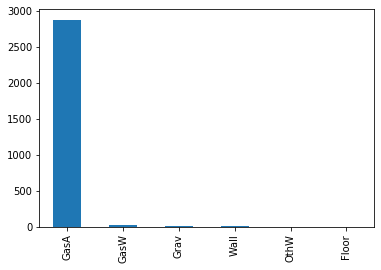

In [599]:
data['Heating'].value_counts().plot(kind='bar')

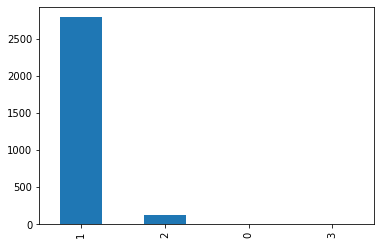

In [600]:
data['KitchenAbvGr'].value_counts().plot(kind='bar')

In [799]:
#droping these columns
data.drop(labels=["Street","Condition2","Utilities",'MiscFeature','PoolQC'],axis=1,inplace=True)
data.shape

(2919, 64)

data["BsmtFin"]=pd.cut(data["BsmtFin"],bins=150).cat.codes
data["MiscVal"]=pd.cut(data["MiscVal"],bins=400).cat.codes
data["BsmtFin"]=pd.cut(data["BsmtFin"],bins=100).cat.codes
data["MiscVal"]=pd.cut(data["MiscVal"],bins=100).cat.codes
data["BsmtFin"]=pd.cut(data["BsmtFin"],bins=100).cat.codes
data["MiscVal"]=pd.cut(data["MiscVal"],bins=100).cat.codes

## Binning 

# Dealing with Categorical Data

## Encoding
__There are 3 types of encoding__
1. __Nominal Encoding__ --> When order of the varable is not important, example gender- Female ,male, there is no specific order so we can assign female 1 or 2 it doesnt make any difference.<br><br>
    a.<u>One Hot Encoding</u>--.Here we will encode the category in a binary vector<br> 
    example  State is column having 3 values [rajasthan ,UP,Maharastra] so what we will do is first we will encode them as integers [rajasthan:0 ,UP:1,Maharastra:2] and now we will encode their label in binaray vector of size 3 as state col has 3 unique values so [rajasthan:[1,0,0] ,UP:[0,1,0],Maharastra:[0,0,1]]<br>but the disadvantage of this is as the unique value in column increases the dimesionality also increases which causes curse of dimensionality.
  <br>
  <br>
    a.<u>One Hot Encoding with multiple categories</u>--> In this type of encoding technique we do not consider all the values what i mean is for example a feature conatins 50 unique values but only 10 values are repeating most of the time so what we will do is we will only apply encoding to the most frequent one and then apply one hot encoding
    
    
2. __Ordinal Encoding__ --> In ordinal Encosing the order of the variable matters for example grades A,B,C here A represents Higher grade so we will give higher ranking to A category or for example postion of employee in a company we have 3 postion,director,manager,support staff so director is at higheest position so we will encode it to value 1 , In ordinal Encoding the Order /ranking matters so we need to encode them by taking order into account.
    a.<u>Label Encoding</u>--> In label encoding we will assign the value on the basis of their order.
    

In [ ]:
categorical_col = data.select_dtypes(include="object").columns
categorical_col

__Get_dummies__
--> It converts the categorical data into one hot encoded vector if we pass the column name in method then it will only convert that columns


In [ ]:
Encoded_data = pd.get_dummies(data)

In [ ]:
Encoded_data.shape

# Importing the sklearn packages

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
#from sklearn.metrics import 

# Dividing the complete data into train and test

In [ ]:
X_train = Encoded_data.iloc[:N]
X_test = Encoded_data.iloc[N:]
print("Dimesnion of training and testing data",X_train.shape,X_test.shape)

# Training the Xgboost 

## 1. Without hyperparameter tuning

In [ ]:
# Crreating the object of xgboost
xg_reg = xgb.XGBRegressor()

# Fitting the model on our training data
xg_reg.fit(X_train,Y_train)

In [ ]:
Y_pred = xg_reg.predict(X_test)

In [834]:
np.sqrt(mean_squared_error(test_acutal,Y_pred))

18773.2831708928

Submission File

In [835]:
submission_df = pd.DataFrame()
submission_df["Id"] = list(submission_id)
submission_df["SalePrice"] = Y_pred
submission_df.to_csv("sample_submission.csv",index=False)

# this submission is giving the score of 0.14019
Now we will improve this by applying different stratigies

## Reducing Feature by applying PCA

In [724]:
Encoded_data.isna().values.sum()

0

In [725]:
from sklearn.decomposition import PCA

In [726]:
pca = PCA(n_components=20)
df = pca.fit_transform((Encoded_data))
sum(pca.explained_variance_ratio_)

0.9999997008268912

In [727]:
df.shape

(2919, 20)

In [728]:
pca.explained_variance_ratio_
df = pd.DataFrame(df)

In [729]:
X_train = df.iloc[:N]
X_test = df.iloc[N:]
print("Dimesnion of training and testing data",X_train.shape,X_test.shape)

Dimesnion of training and testing data (1460, 20) (1459, 20)


In [730]:
# Crreating the object of xgboost
xg_reg = xgb.XGBRegressor()

# Fitting the model on our training data
xg_reg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [731]:
Y_pred = xg_reg.predict(X_test)

In [732]:
np.sqrt(mean_squared_error(test_acutal,Y_pred))

28551.352818859774

In [704]:
submission_df = pd.DataFrame()
submission_df["Id"] = list(submission_id)
submission_df["SalePrice"] = Y_pred
submission_df.to_csv("sample_submission.csv",index=False)

## Even this does not make significant difference in scores

# 3.Hyperparameter tuning using Randomized Search cv

In [246]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from sklearn.metrics import accuracy_score

In [56]:
xg_reg = xgb.XGBRegressor()
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("start Time =", current_time)
parameters_dict = {"n_estimators":[1100,1500,2000,3000,4000],
                  "gamma":[0.1,0.2,0.3,0.5,0.8],
                   "booster":[ "gbtree", "gblinear"],
                   "learning_rate": [0.05,0.005,0.01,0.001,0.025,0.03],
                   "reg_alpha": np.random.uniform(0.1,0.3,size =5),
                   "reg_lambda": np.random.uniform(0.1,0.3,size =5),
                   " min_child_weight ":[1,2,3,4],
                   "objective":['reg:squarederror',"reg:linear"]
                  }

# creating the random search object from finding the best parameters
search = RandomizedSearchCV(xg_reg,param_distributions=parameters_dict,random_state=42,verbose=True,n_jobs=-1,n_iter=200,return_train_score=True,cv=StratifiedKFold())
#neg-mean-absolute-error

# training the random search cv
search.fit(X_train,Y_train)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("end Time =", current_time)

#  Printing the scores
print("Best parameters",search.best_params_)
print("Best Scores",search.best_score_)


start Time = 06:44:51
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 41.6min finished


[07:26:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


end Time = 07:26:34
Best parameters {'reg_lambda': 0.18180129860425695, 'reg_alpha': 0.16836893741906905, 'objective': 'reg:squarederror', 'n_estimators': 1500, 'max_depth': 2, 'learning_rate': 0.025, 'gamma': 0.5, 'booster': 'gbtree', ' min_child_weight ': 4}
Best Scores 0.8782407170161395


In [502]:
#As we can see the best parameters area
best_parameters = search.best_params_

In [503]:
best_parameters

{'reg_lambda': 0.18180129860425695,
 'reg_alpha': 0.16836893741906905,
 'objective': 'reg:squarederror',
 'n_estimators': 1500,
 'max_depth': 2,
 'learning_rate': 0.025,
 'gamma': 0.5,
 'booster': 'gbtree',
 ' min_child_weight ': 4}

xg_reg = xgb.XGBRegressor(reg_lambda= 0.18817486067848438,reg_alpha= 0.17001747926604993,n_estimators= 1500,max_depth= 2,learning_rate= 0.05,gamma= 0.5 ,booster='gbtree',min_child_weight= 4)
xg_reg.fit(X_train,Y_train)

In [808]:
xg_reg = xgb.XGBRegressor(reg_lambda= best_parameters['reg_lambda'],reg_alpha= best_parameters['reg_alpha'],n_estimators=best_parameters['n_estimators'],learning_rate= best_parameters['learning_rate'],gamma=best_parameters['gamma'] ,booster=best_parameters['booster'],min_child_weight= best_parameters[' min_child_weight '])
xg_reg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.025, max_delta_step=0, max_depth=6,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.16836893741906905, reg_lambda=0.18180129860425695,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [809]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xg_reg, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [810]:
Y_pred = xgb_model_loaded.predict(X_test)

In [811]:
submission_df = pd.DataFrame()
submission_df["Id"] = list(submission_id)
submission_df["SalePrice"] = Y_pred
submission_df.to_csv("sample_submission.csv",index=False)

#### Because of hyperparameter tuning the score got decreased a little bit but we need to deal with features score -0.13415

In [737]:
k=['Neighborhood_Blmngtn','Neighborhood_BrDale','Neighborhood_MeadowV','Neighborhood_NPkVill','Neighborhood_Veenker','Condition1_Feedr','Condition1_PosA','Condition1_RRAn','BldgType_Duplex','BldgType_Twnhs','HouseStyle_2.5Fin','HouseStyle_SFoyer','RoofStyle_Gambrel','Exterior1st_Stucco','Exterior1st_WdShing','Exterior2nd_ImStucc','Exterior2nd_Stucco','Exterior2nd_Wd Shng','SaleType_COD','SaleType_CWD','Fence_MnWw','Electrical_FuseA','Electrical_FuseF','Foundation_Slab','BsmtExposure_Mn','BsmtExposure_no','Heating_GasA','Heating_Wall','HeatingQC_2']

In [812]:
dict(zip(Encoded_data.columns,xgb_model_loaded.feature_importances_))

{'MSSubClass': 0.0010479249,
 'LotFrontage': 0.001576849,
 'LotArea': 0.0024113345,
 'YearRemodAdd': 0.0075575435,
 'MasVnrArea': 0.00084252784,
 'BsmtFinType1': 0.0020782535,
 'BsmtFinType2': 0.0002671036,
 'BsmtUnfSF': 0.00035433494,
 'TotalBsmtSF': 0.012252195,
 'LowQualFinSF': 0.00015924181,
 'GrLivArea': 0.02647084,
 'BedroomAbvGr': 0.0077982633,
 'KitchenAbvGr': 0.0005470035,
 'TotRmsAbvGrd': 0.0010970543,
 'Fireplaces': 0.009515223,
 'FireplaceQu': 0.0056943037,
 'GarageYrBlt': 0.0015406208,
 'GarageCars': 0.50187534,
 'GarageArea': 0.0011468644,
 'WoodDeckSF': 0.0011342524,
 'OpenPorchSF': 0.0007900848,
 'EnclosedPorch': 0.00022737372,
 '3SsnPorch': 0.0002706309,
 'ScreenPorch': 0.00076016644,
 'PoolArea': 0.00096386933,
 'MiscVal': 0.00027883146,
 'MoSold': 0.0007734025,
 'Exter_points': 0.011260327,
 'Bsmt_points': 0.036870033,
 'Garage_points': 0.009417734,
 'overall_points': 0.03927289,
 'BsmtFin': 0.0049838605,
 'Age_House': 0.00895754,
 'Bsmt_bath': 0.0012984875,
 'Total_

In [739]:
xg_reg.score(X_train,Y_train)

0.9998545691457783

In [740]:
np.sqrt(mean_squared_error(test_acutal,Y_pred))

27224.759649266005

In [618]:
import matplotlib.pyplot as plt

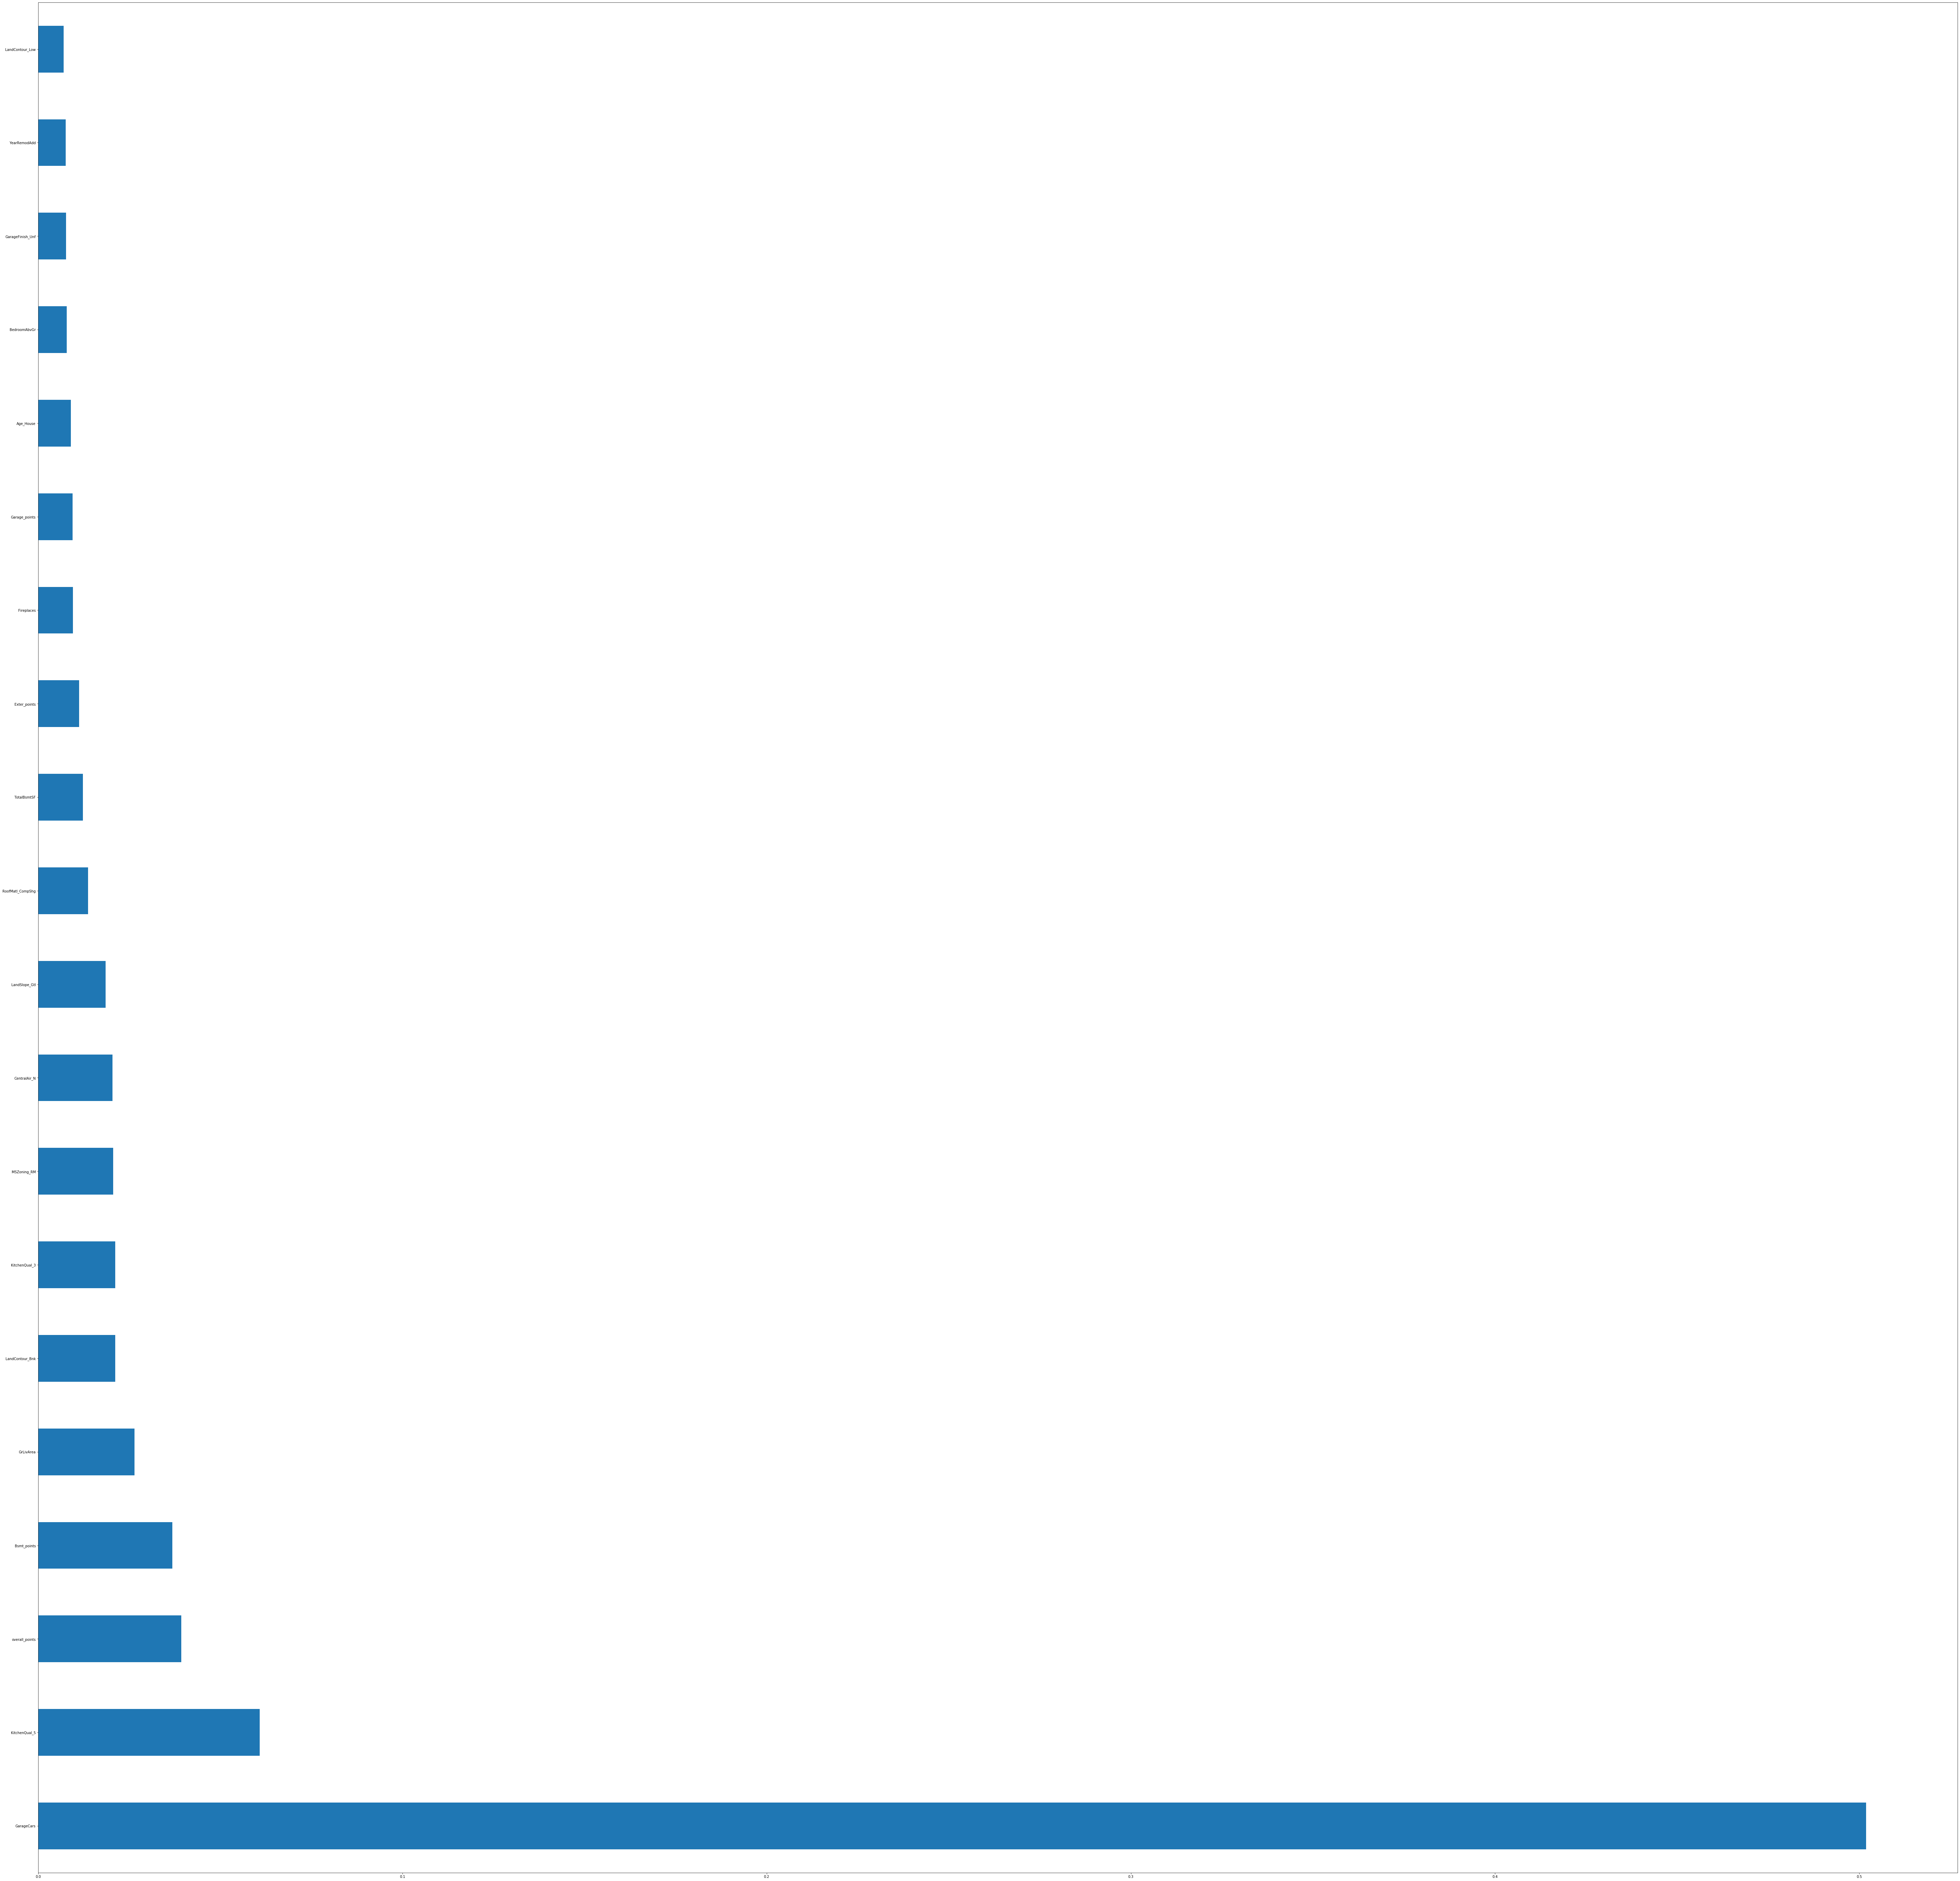

In [619]:
feat_importances = pd.Series(xg_reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(100,100))

# Train XGBRegresser on the basis of feature importance

# Trying a Different Strategy for feature selection


In [836]:
len(xgb_model_loaded.feature_importances_)

229

In [837]:
len(Encoded_data.columns)

229

In [838]:
li=list(zip(xgb_model_loaded.feature_importances_,Encoded_data.columns))
print(len(li))
li.sort(reverse=True)
print(len(li))
li=dict(li)
li

229
229


{0.50187534: 'GarageCars',
 0.060854338: 'KitchenQual_5',
 0.03927289: 'overall_points',
 0.036870033: 'Bsmt_points',
 0.02647084: 'GrLivArea',
 0.02117173: 'LandContour_Bnk',
 0.02111529: 'KitchenQual_3',
 0.020585038: 'MSZoning_RM',
 0.020449545: 'CentralAir_N',
 0.018525682: 'LandSlope_Gtl',
 0.0137103805: 'RoofMatl_CompShg',
 0.012252195: 'TotalBsmtSF',
 0.011260327: 'Exter_points',
 0.009515223: 'Fireplaces',
 0.009417734: 'Garage_points',
 0.00895754: 'Age_House',
 0.0077982633: 'BedroomAbvGr',
 0.007695257: 'GarageFinish_Unf',
 0.0075575435: 'YearRemodAdd',
 0.0069634374: 'LandContour_Low',
 0.006140677: 'Functional_Min2',
 0.005819638: 'PavedDrive_N',
 0.0056943037: 'FireplaceQu',
 0.00510354: 'Total_bath',
 0.0049838605: 'BsmtFin',
 0.004476495: 'SaleType_WD',
 0.004394664: 'Exterior2nd_BrkFace',
 0.0040309792: 'Neighborhood_Crawfor',
 0.0034989114: 'Exterior1st_BrkFace',
 0.0034532729: 'Condition1_Norm',
 0.002871426: 'Functional_Typ',
 0.0028628844: 'Neighborhood_Edwards',
 

In [839]:
len(li)

183

In [840]:
k = list(li.values())
len(k)

183

In [841]:
req = k[:150]
n_req = k[150:]
nn_req = set(Encoded_data.columns) - set(k)
nn_req=list(nn_req)

In [842]:
len(n_req),len(nn_req)

(33, 46)

In [843]:
len(req)

150

# feature impportance

In [512]:
li=['LotConfig_FR3','Neighborhood_Blueste','Condition1_RRNe','Condition1_RRNn','BldgType_2fmCon','HouseStyle_2.5Unf','RoofStyle_Flat','RoofStyle_Mansard','RoofStyle_Shed','RoofMatl_ClyTile','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','Exterior1st_AsphShn','Exterior1st_BrkComm','Exterior1st_CBlock','Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_AsphShn','Exterior2nd_Brk Cmn','Exterior2nd_CBlock','Exterior2nd_Other','Exterior2nd_Stone','Foundation_Stone','Foundation_Wood','Heating_Floor','Heating_Grav','Heating_OthW','HeatingQC_1','CentralAir_Y','Electrical_FuseP','Electrical_Mix','Functional_Maj1','Functional_Min1','Functional_Sev','GarageType_2Types','GarageType_no','GarageFinish_no','SaleType_Con','SaleType_ConLD','SaleType_Oth','SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Partial']


In [844]:
Encoded_data.drop(labels=n_req,axis=1,inplace=True)
Encoded_data.drop(labels=nn_req,axis=1,inplace=True)

In [845]:
Encoded_data.shape

(2919, 150)

In [846]:
X_train = Encoded_data.iloc[:N]
X_test = Encoded_data.iloc[N:]
print("Dimesnion of training and testing data",X_train.shape,X_test.shape)

Dimesnion of training and testing data (1460, 150) (1459, 150)


In [847]:
# Crreating the object of xgboost
xg_reg = xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [855]:
from sklearn.model_selection import GridSearchCV
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("start Time =", current_time)
parameters = {"n_estimators":[100,500,900],
                  "gamma":[0.1,0.01,0.001],
                   "max_depth":[2,4,6],
                   "learning_rate": [0.0001,0.01,0.001,0.025],
                   "reg_alpha": np.random.uniform(0,1,size=3),
                   "reg_lambda": np.random.uniform(0.1,1,size =3),
                   " min_child_weight ":[2,3,4]
                  }
clf = GridSearchCV(xg_reg,param_grid= parameters,n_jobs=-1,cv=2,verbose=1)
clf.fit(X_train,Y_train)

start Time = 16:24:59
Fitting 2 folds for each of 2916 candidates, totalling 5832 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 58.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 76.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 97.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 119.6min
[Parallel(n_jobs=-1)]: Done 5832 out of 5832 | elapsed: 140.7min finished


[18:45:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: {  min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_...
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={' min_child_weight ': [2, 3, 4],
       

In [858]:
#As we can see the best parameters area
best_parameters = clf.best_params_
best_parameters

{' min_child_weight ': 2,
 'gamma': 0.1,
 'learning_rate': 0.025,
 'max_depth': 2,
 'n_estimators': 900,
 'reg_alpha': 0.09878060872391159,
 'reg_lambda': 0.2187752008319761}

In [860]:
xg_reg = xgb.XGBRegressor(reg_lambda= best_parameters['reg_lambda'],reg_alpha= best_parameters['reg_alpha'],n_estimators=best_parameters['n_estimators'],learning_rate= best_parameters['learning_rate'],gamma=best_parameters['gamma'],min_child_weight= best_parameters[' min_child_weight '])
xg_reg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.025, max_delta_step=0, max_depth=6,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.09878060872391159, reg_lambda=0.2187752008319761,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [861]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xg_reg, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [862]:
xgb_model_loaded.score(X_train,Y_train)

0.9991443683367096

In [3]:
Y_pred = xg_reg.predict(X_test)

NameError: name 'xg_reg' is not defined

In [865]:
np.sqrt(mean_squared_error(test_acutal,Y_pred))

18494.662535365675

## selecting top 100 feature on basis of feature imp

In [866]:
submission_df = pd.DataFrame()
submission_df["Id"] = list(submission_id)
submission_df["SalePrice"] = Y_pred
submission_df.to_csv("sample_submission.csv",index=False)

In [1]:
xg_reg.score(X_train,Y_train)

NameError: name 'xg_reg' is not defined

In [ ]:
#use when data has non categorical values
thresholder = VarianceThreshold(threshold=.8)

# Conduct variance thresholding
data_high_variance = thresholder.fit_transform(data)
data_high_variance